In [ ]:
# ETL Step 2: Transform
import pandas as pd

# Load the raw datasets
raw_df = pd.read_csv('data/raw_data.csv')
incr_df = pd.read_csv('data/incremental_data.csv')

# Define a transformation function for both datasets
def transform(df, label="Dataset"):
    print(f"\n Transforming {label} ")
    print("Original shape:", df.shape)

    # 1. Cleaning: Remove duplicates
    # Why? Duplicates may represent accidental re-entry of records and can skew analysis.
    df = df.drop_duplicates()
    print("After removing duplicates:", df.shape)

    # 2. Cleaning: Fill missing numeric values
    # Why? Missing values in numeric columns can break calculations; median is robust to outliers.
    for col in df.select_dtypes(include='number').columns:
        if df[col].isnull().any():
            median_value = df[col].median()
            print(f"Filling missing values in '{col}' with median value: {median_value}")
            df[col] = df[col].fillna(median_value)

    # 3. Enrichment: Create a new 'total_price' column
    # Why? total_price (quantity * unit_price) is a useful business metric for revenue.
    if 'quantity' in df.columns and 'unit_price' in df.columns:
        df['total_price'] = df['quantity'] * df['unit_price']
        print("New column 'total_price' added (quantity * unit_price).")

    # 4. Structural: Convert order_date to datetime, extract year
    # Why? Ensures correct date formatting and enables time-based analysis.
    if 'order_date' in df.columns:
        df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
        df['order_year'] = df['order_date'].dt.year
        print("Converted 'order_date' to datetime and created 'order_year'.")

    # Show the first few rows after transformation
    print(f"Transformed {label} preview:")
    display(df.head())

    return df

# Apply transformation to both datasets
transformed_full = transform(raw_df, "Full Dataset")
transformed_incr = transform(incr_df, "Incremental Dataset")

# Save transformed outputs
transformed_full.to_csv('transformed/transformed_full.csv', index=False)
transformed_incr.to_csv('transformed/transformed_incremental.csv', index=False)

print("\n✅ Transformation complete. Files saved to /transformed/")



 Transforming Full Dataset 
Original shape: (100, 7)
After removing duplicates: (99, 7)
Filling missing values in 'quantity' with median value: 2.0
Filling missing values in 'unit_price' with median value: 500.0
New column 'total_price' added (quantity * unit_price).
Converted 'order_date' to datetime and created 'order_year'.
Transformed Full Dataset preview:


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15424\2924987156.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(median_value)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15424\2924987156.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(median_value)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15424\2924987156.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_year
0,1,Diana,Tablet,2.0,500.0,2024-01-20,South,1000.0,2024.0
1,2,Eve,Laptop,2.0,500.0,2024-04-29,North,1000.0,2024.0
2,3,Charlie,Laptop,2.0,250.0,2024-01-08,NaN,500.0,2024.0
3,4,Eve,Laptop,2.0,750.0,2024-01-07,West,1500.0,2024.0
4,5,Eve,Tablet,3.0,500.0,2024-03-07,South,1500.0,2024.0



 Transforming Incremental Dataset 
Original shape: (10, 7)
After removing duplicates: (10, 7)
Filling missing values in 'quantity' with median value: 1.5
New column 'total_price' added (quantity * unit_price).
Converted 'order_date' to datetime and created 'order_year'.
Transformed Incremental Dataset preview:


,order_id,customer_name,product,quantity,unit_price,order_date,region,total_price,order_year
0,101,Alice,Laptop,1.5,900.0,2024-05-09,Central,1350.0,2024
1,102,NaN,Laptop,1.0,300.0,2024-05-07,Central,300.0,2024
2,103,NaN,Laptop,1.0,600.0,2024-05-04,Central,600.0,2024
3,104,NaN,Tablet,1.5,300.0,2024-05-26,Central,450.0,2024
4,105,Heidi,Tablet,2.0,600.0,2024-05-21,North,1200.0,2024



✅ Transformation complete. Files saved to /transformed/


In [10]:
# FOR VISUALIZATIONS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('transformed/transformed_full.csv')

# Optional: Create total_price and order_year if not already there
if 'total_price' not in df.columns and 'quantity' in df.columns and 'unit_price' in df.columns:
    df['total_price'] = df['quantity'] * df['unit_price']
if 'order_year' not in df.columns and 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['order_year'] = df['order_date'].dt.year

# Clean NaNs before plotting
df_clean = df.dropna(subset=['product', 'quantity', 'unit_price', 'total_price', 'order_year'])

# Set Seaborn style
sns.set(style="whitegrid")


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13668\1800563888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13668\1800563888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['order_month'] = df_clean['order_date'].dt.to_period('M').astype(str)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13668\1800563888.py:12: FutureWarning: 

Passing `palette`

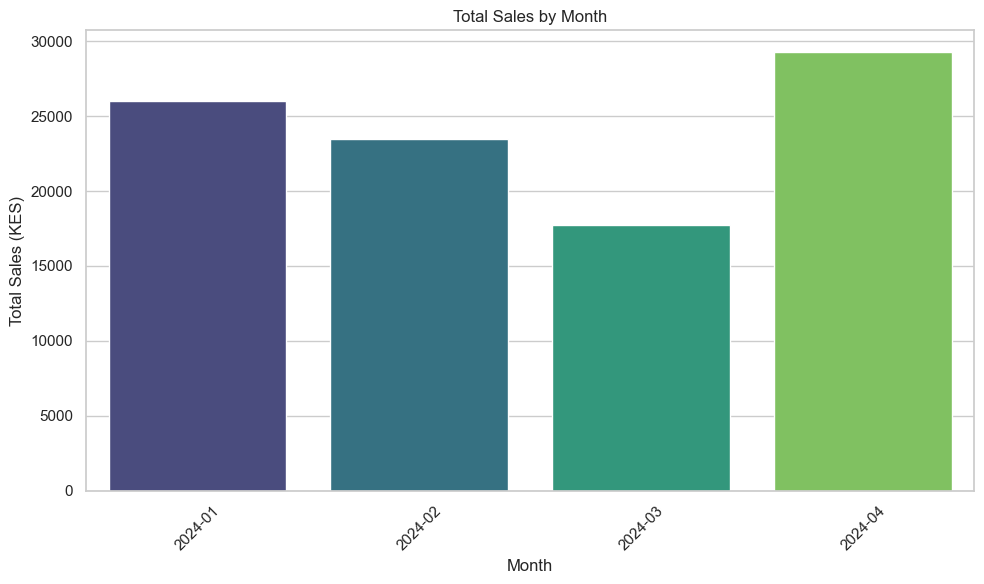

In [24]:
# Ensure order_date is datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'], errors='coerce')

# Create a new column for Year-Month
df_clean['order_month'] = df_clean['order_date'].dt.to_period('M').astype(str)

# Group by month
monthly_sales = df_clean.groupby('order_month')['total_price'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='order_month', y='total_price', data=monthly_sales, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (KES)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13668\293883879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product', x='total_price', data=top_products, palette='magma')


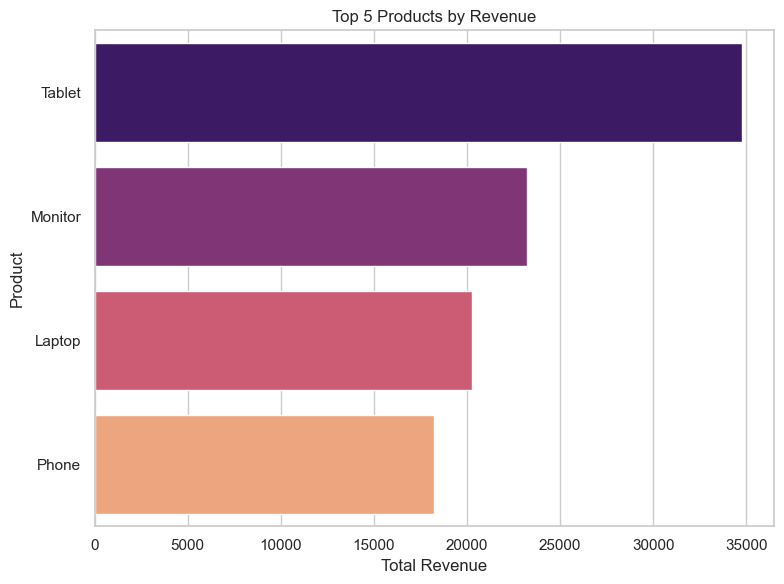

In [21]:
plt.figure(figsize=(8, 6))
top_products = df_clean.groupby('product')['total_price'].sum().nlargest(5).reset_index()
sns.barplot(y='product', x='total_price', data=top_products, palette='magma')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


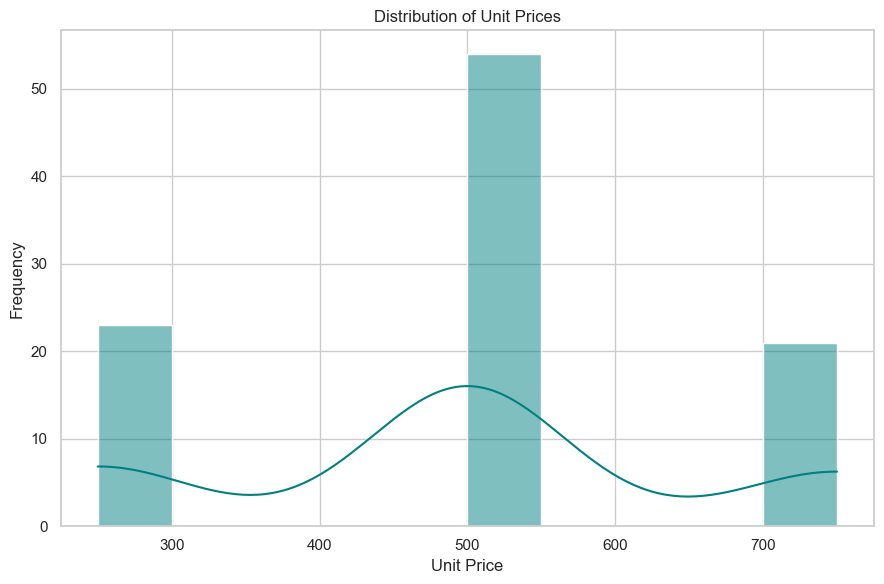

In [22]:
plt.figure(figsize=(9, 6))
sns.histplot(data=df_clean, x='unit_price', bins=10, kde=True, color='teal')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
